**LU1MEPY3 - Projet numérique**

# Chute libre de Felix Baumgartner

## Préambule

Felix Baumgartner, parachutiste autrichien, s'est lancé dans le vide à 39 km au-dessus de la Terre le 14 octobre 2012 : ce saut lui a permis de battre plusieurs records du monde dont celui d'avoir dépassé le mur du son avec une vitesse maximale atteinte de 377 m/s. La durée de la chute libre était de 4 min 20 s avant l'ouverture de son parachute à environ 2,5 km d'altitude. La durée totale du saut était de 9 min 3 s (voir le site web : https://www.redbull.com/int-en/projects/red-bull-stratos/). 

Il s'agit en particulier :
- de déterminer la vitesse maximale atteinte par Baumgartner lors de la chute libre en exploitant des résultats de mesure (partie 1) ; 
- de déterminer la vitesse maximale théorique lors de la chute libre en recourant à un modèle adéquat (partie 2) ; 
- de simuler le saut en chute libre de Baumgartner (partie 3).  

Le sujet est librement inspiré d'un texte de TD de l'UE LU1MEPY2 (UE de Mécanique-Physique du 2nd semestre).

<img src="Baumgartner.jpg" style="width:267px;height:400px"/>
Photographie : Jay Nemeth/Red Bull Content Pool

Thèmes : Forces (gravitationnelle, poids, traînée). Équilibre des forces. Loi des gaz parfaits

Outils / méthodes : matplotlib ; numpy ; interpolation ; boucles ; calcul d'erreurs et de statistiques ; méthode d'Euler-Cromer 

## Partie 1. Exploitation des données expérimentales

Felix Baumgartner, équipé de son scaphandre, présente une masse d'environ $m =$ 120 kg et une superficie de $S =$ 1,1  m$^{2}$. Le coefficient de traînée vaut $C_x =$ 0,7. Sa vitesse de norme $v_{\text{B}}$ et son altitude $z_{\text{B}}$ en tout instant $t$ du saut ont été mesurées.  

Dans cette première partie, nous commençons par étudier les données expérimentales qui permettront de déduire en particulier la vitesse maximale $v_{\text{Bmax}}$ de Baumgartner et les altitudes pour lesquelles sa vitesse $v_{\text{B}}$ dépasse la vitesse du son $v_{\text{son}}$.  

Commençons par importer les bibliothèques nécessaires :

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Le fichier "Alt-Vit-Baumgartner.txt" est constitué des données de l'altitude $z_{\text{B}}$ (en m, 1$^{\text{ère}}$ colonne) et de la norme $v_{\text{B}}$ de la vitesse de Baumgartner (en km/h, 2$^{\text{ème}}$ colonne).   
Le fichier "Alt-Vit-son.txt" est constitué des données de l'altitude $z_{\text{son}}$ (en m, 1$^{\text{ère}}$ colonne) et de la vitesse du son $v_{\text{son}}$ dans l'air (en m/s, 2$^{\text{ème}}$ colonne). La vitesse du son $v_{\text{son}}$ dans l'air varie avec la température $T$ qui varie elle-même avec l'altitude $z_{\text{son}}$ : de $v_{\text{son}}= $ 340 m/s au niveau de la mer ($z_{\text{son}} = $ 0 et à $T = $ 15°C), elle diminue dans la troposphère (jusqu'à 11 km d'altitude) pour atteindre un palier à $v_{\text{son}}= $  295 m/s dans la stratosphère basse (entre 11 et 25 km d'altitude, $T = -$56,5°C) puis remonte dans la stratosphère haute (au delà de 25 km d'altitude) : ainsi $v_{\text{son}}= $ 303 m/s à $z_{\text{son}} =$ 32 km (où $T = -$45°C) par exemple.   

**Question 1.a**  

Tracer les courbes de $v_{\text{B}}$ et de $v_{\text{son}}$ en fonction de l'altitude sur le même graphe. Inverser l'axe des abscisses (altitudes décroissantes) en utilisant la fonction "matplotlib.pyplot.axis()" (voir https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html).

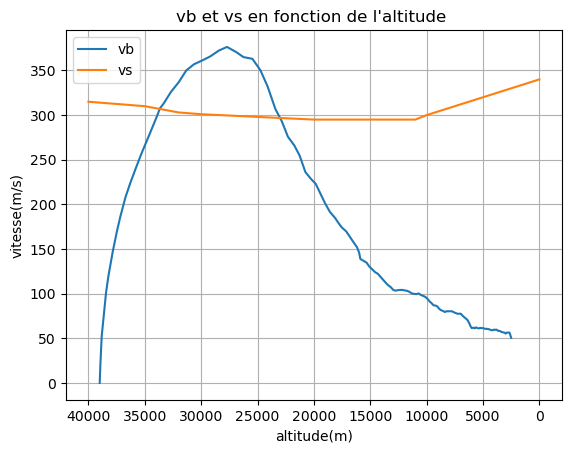

In [2]:
vb=np.loadtxt("Alt-Vit-Baumgartner.txt")[:,1]/3.6
zb=np.loadtxt("Alt-Vit-Baumgartner.txt")[:,0]
vs=np.loadtxt("Alt-Vit-son.txt")[:,1]
zs=np.loadtxt("Alt-Vit-son.txt")[:,0]

plt.plot(zb,vb)
plt.title("vb et vs en fonction de l'altitude ")
plt.xlabel("altitude(m)")
plt.ylabel("vitesse(m/s)")
plt.grid(True)

plt.plot(zs, vs)
plt.legend(['vb','vs'])
plt.grid(True)

plt.gca().invert_xaxis()

**Question 1.b**  

Quelle est la vitesse maximale $v_{\text{Bmax}}$ atteinte par Baumgartner ? A quelle altitude $z_{\text{Bm}}$ correspond cette vitesse maximale ? 

In [3]:
vbmax=np.max(vb)
print(f"La vitesse maximale atteinte par Baumgartneer est de{vbmax : 1.2f}m/s")
zbmax=zb[(vb==vbmax)]
print(f"L'altitude qui correspond a cette vitesse maximale est {zbmax} m")


La vitesse maximale atteinte par Baumgartneer est de 376.39m/s
L'altitude qui correspond a cette vitesse maximale est [27710.] m


**Question 1.c** 

Calculer sa vitesse moyenne jusqu'à 20 km d'altitude, puis sur toute la chute libre (avant ouverture du parachute à 2,5 km d'altitude).


In [4]:
vmb=np.loadtxt("Alt-Vit-Baumgartner.txt")[:95,1]/3.6
print(f"La vitesse moyenne jusqu'à 20km altitude est environ {np.mean(vmb):2.2f}m/s")

moyenne_vchute=np.mean(np.loadtxt("Alt-Vit-Baumgartner.txt")[0:129,1]/3.6) #sur toute la chute libre
print(f"La vitesse moyenne est {moyenne_vchute :1.1f} m/s")

La vitesse moyenne jusqu'à 20km altitude est environ 97.32m/s
La vitesse moyenne est 141.0 m/s


**Question 1.d**  

Déterminer les altitudes pour lesquelles Baumgartner se déplace à une vitesse supersonique ($v_{\text{B}}\geq v_{\text{son}}$). Pour ce faire, procéder de la façon suivante : 

i) Les valeurs d'altitude pour la vitesse de Baumgartner doivent correspondre aux valeurs d'altitude pour la vitesse du son. On commence par choisir des valeurs d'altitude régulièrement espacées de 100 m sur l'intervalle considéré de la chute libre (de 39 km à 2,5 km) ; on utilise la fonction "numpy.linspace()". Voir https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

ii) Puis, les valeurs de vitesse de Baumgartner et de vitesse de son doivent être interpolées pour les valeurs d'altitude précédemment choisies ; on utilise la fonction "numpy.interp()". Voir : https://fr.wikibooks.org/wiki/Python_pour_le_calcul_scientifique/Interpolation,_extrapolation_et_lissage ; https://numpy.org/doc/stable/reference/generated/numpy.interp.html

iii) Enfin, on recherche les valeurs d'altitude pour lesquelles les valeurs interpolées de vitesse de Baumgartner sont supérieures ou égales aux valeurs interpolées de vitesse du son ; on utilise la fonction "numpy.nonzero()". Voir : https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html#numpy.nonzero

In [5]:
at=np.arange(2500,39000,100)
p=np.interp(at,zb,vb)
o=np.interp(at,zs,vs)
#Les valeurs de vitesse de Baumgartner et de vitesse de son interpolées pour les valeurs d'altitude
m=np.nonzero(p>=o)
#Les valeurs interpolées de vitesse de Baumgartner sontsupérieurs ou égales aux valeurs interpolées de vitesse du son 

print ( at[m])

[23100 23200 23300 23400 23500 23600 23700 23800 23900 24000 24100 24200
 24300 24400 24500 24600 24700 24800 24900 25000 25100 25200 25300 25400
 25500 25600 25700 25800 25900 26000 26100 26200 26300 26400 26500 26600
 26700 26800 26900 27000 27100 27200 27300 27400 27500 27600 27700 27800
 27900 28000 28100 28200 28300 28400 28500 28600 28700 28800 28900 29000
 29100 29200 29300 29400 29500 29600 29700 29800 29900 30000 30100 30200
 30300 30400 30500 30600 30700 30800 30900 31000 31100 31200 31300 31400
 31500 31600 31700 31800 31900 32000 32100 32200 32300 32400 32500 32600
 32700 32800 32900 33000 33100 33200 33300 33400 33500 33600]


## Partie 2. Modélisation de la chute libre

### 2.1 Bilan des forces - Modèle avec la masse volumique constante

Lors de sa chute libre, Baumgartner est soumis à l'action de deux forces extérieures : son poids $\vec{P}$ et la force de traînée $\vec{F_\text{t}}$.  

#### a) Force de pesanteur

On choisit un axe (O$z$) vertical, dont l'origine O se situe à la surface de la Terre, orienté vers le ciel et de vecteur unitaire $\vec{u}_z$. On appelle $\mathcal{G}$ la constante gravitationnelle, $M_\text{T}$ la masse de la Terre et $R_\text{T}$ le rayon de la Terre.

Il s'agit ici d'exprimer la fonction "AccPes(z)" permettant de calculer la composante $g_{z}$ du vecteur accélération de la pesanteur $\vec{g}$ en fonction de l'altitude $z$. Pour cela, vous procéderez ainsi :  
i) à partir de l'expression de la force gravitationnelle, exprimer la composante $P_z$ du poids $\vec{P}$ de Baumgartner ;  
ii) en déduire la fonction "AccPes(z)" permettant de calculer la composante $g_z$ du vecteur accélération de la pesanteur $\vec{g}$ en fonction de l'altitude $z$.


**Question n°2.a**

Écrire la fonction **AccPes(z)**.

In [6]:
def AccPes(z):
    G=6.67430e-11 #constante gravitationnelle
    mt=5.972*10**24 #masse de la terre
    Rt=6371*1000 #rayon de la terre
    
    g=(G*mt)/(Rt+z)**2
    return g
print(f"L'accelaration de la pesenteur en fonction de z=0 : g ={AccPes(0):2.2f} m^2/s")
print(f"L'acceleration de la pesenteur en fonction de z=25m : g = {AccPes(25):2.2f} m^2/s")

L'accelaration de la pesenteur en fonction de z=0 : g =9.82 m^2/s
L'acceleration de la pesenteur en fonction de z=25m : g = 9.82 m^2/s


**Question n°2.b**

Calculer $g_z$ pour quelques valeurs de $z$ comprises entre la surface du sol et l'altitude $z = $ 39 km (par pas de 5 km par exemple). Commenter la dépendance de l'accélération de la pesanteur avec l'altitude. 

In [7]:
z=np.linspace(0,39000,9)
print(AccPes(z))

#l'altitude influence l'acceleration de pesenteur , plus elle augmente plus l'acceleration de la pesenteur est faible 
#car l'altitude z n'est pas negligable devant le rayon de la terre 

[9.81997343 9.80496245 9.78998586 9.77504356 9.76013544 9.7452614
 9.73042134 9.71561515 9.70084273]


#### b) Force de traînée

La force de traînée $\vec{F_\text{t}}$ est la force de frottement exercée par l'air sur le corps de Baumgartner. Elle dépend entre autres de la vitesse $v_{\text{B}}$ de Baumgartner et de la masse volumique de l'air $\rho$ supposée ici constante.  

Il s'agit de définir la fonction **Frott(v,rho)** permettant de calculer la composante $F_{\text{t}z}$ du vecteur force de traînée $\vec{F_\text{t}}$ en fonction de $v_{\text{B}}$ et $\rho$. 

In [10]:
#pour cree la fonction Frott on va initialise le coefficient de trainee ainsi quer la surface de reference puis on ecrira 
#la formuile de la force de trainee en fonction du coefficient de trainée , a surface , la vitesse de baumgartner ainsi que 
#la masse volumique de l'air 

**Question n°2.c**

Écrire la fonction **Frott(v,rho)**.

In [8]:
def Frott(v,rho):
    s=1.1 #est la surface frontale
    cx=0.7 #est le coefficient de trainée 
    ftz=1/2*cx*rho*s*(v**2)
    return ftz

print(f"Frottements sont égales à {Frott(300/3.6,1.2):1.1f}N")

Frottements sont égales à 3208.3N


#### c) Condition d'équilibre et vitesse maximale atteinte dans le cadre du modèle "masse volumique de l'air constante"

À partir de la condition d'équilibre des forces, projetée selon l'axe (O$z$), il est possible de déduire l'expression de la vitesse maximale que peut atteindre Baumgartner. Il s'agit ici de calculer cette vitesse en utilisant un modèle dans lequel la masse volumique de l'air est supposée constante ainsi que l'accélération de la pesanteur ($g_z = -$9,75 m/s$^2$). Vous choisirez comme valeur de $\rho$ la valeur typique de la masse volumique de l'air à 15°C au niveau de la mer. La vitesse maximale ainsi calculée sera comparée à la vitesse maximale mesurée (Question 1.b).

**Question n°2.d**

Calculer la valeur numérique de la vitesse maximale théorique $v_\text{Bm-th}$. Comparer avec la valeur mesurée $v_\text{Bmax}$ et conclure.


In [9]:
#a partir de la condition d'equilibre des forces , projetée selon l'axe (oz)
# -m*g+1/2*cx*rho*s*(v**2)==0
import math as m 
rho =1.292 #kg.m^-3
m=120.0
cx=0.7
g=9.81
s=1.1
vit_max_theo=(2.0*m*g/(cx*s*rho))**(1/2)
print(f"{vit_max_theo:2.2f}m/s")

#le modele n'est pas adapter a cette situation
#on remarque que la vitesse mesuree est nettement inferieur à la vitesse maximal qui est de 376m/s
# car la masse volumique de l'air est supposée constante 
#la masse volumique ne peut pas etre constante 

48.65m/s


### 2.2. Bilan des forces - Modèle avec variations de la masse volumique de l'air avec l'altitude 

La pression $p$, la température $T$ et la masse volumique de l’air $\rho$ varient avec l’altitude $z$. En particulier, $\rho$ décroit rapidement quand $z$ augmente.  

#### a) $\rho= f(z)$ : courbe expérimentale

##### **Question 2.e**  

Le fichier "Alt-Masse-vol.txt" est constitué des données de l'altitude $z$ (en m, 1$^{\text{ère}}$ colonne) et de la masse volumique $\rho$ (kg/m$^3$, 2$^{\text{ème}}$ colonne). Tracer la courbe $\rho = f(z)$.


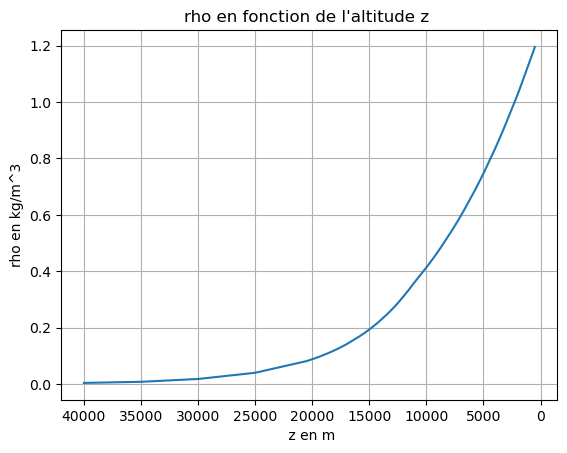

In [10]:
zq =np.loadtxt("Alt-Masse-vol.txt")[:,0]
rho=np.loadtxt("Alt-Masse-vol.txt")[:,1]
plt.plot(zq , rho )
plt.title("rho en fonction de l'altitude z ")
plt.gca().invert_xaxis() #on inverse les axes des abscisses car son altitude diminue durant la chute
plt.xlabel(" z en m")
plt.ylabel("rho en kg/m^3")
plt.grid(True)

#### b) $\rho(z)$ : modèle d'atmosphère

##### **Question 2.f** 

En partant de la loi des gaz parfaits, déterminer l'expression de la masse volumique $\rho(z)$ en fonction en particulier de la pression $p(z)$ et de la température $T(z)$.

In [11]:
#p*v =n*R*T
#rho=P*M/(T*R)
def masvol(T,p):
    R=8.31
    M=29*10**(-3)
    return p*M/(T*R)

# R est la constante de gaz parfait
# p : est la pression 
#T est la tempéarature 
#M est la masse molaire (kg/mol^-1)
#rho est la masse volumique en (kg/mol^3) 
# reponse : pz = p*M/r*t

##### **Question 2.g**  

Nous allons ici étudier les variations de la masse volumique en fonction de l'altitude en utilisant les modèles adéquats décrivant $p(z)$ et $T(z)$.

**Dans la troposphère ($z\leqslant$ 11 km)**, c'est le modèle à gradient de température constant qui est le mieux adapté : $T(z) = T_0+\alpha_{\text{T}} z$ avec $T_0 =$ 15°C et $\alpha_{\text{T}} = -$0.0065 K/m. 
Ainsi, la pression s'écrit : $p(z) = p_{0} \left({\frac{T_0}{T(z)}}\right)^{\frac{Mg}{\mathcal{R}\alpha_{\text{T}}}}$. $p_{0}$ et $T_0$ sont respectivement les pression et température au niveau du sol. $\mathcal{R}$ est la constante des gaz parfaits.  

Au delà de la troposphère, on pénètre dans la **stratosphère basse (11 km $\lt z \leqslant$ 25 km)**, dans laquelle la température reste quasiment constante ($T_1 = -$56.5°C). Le modèle à appliquer est donc celui de l'atmosphère isotherme. Ainsi, $\rho(z) = \frac{M }{\mathcal{R} T_1}p(z) $ avec la pression $p(z) = p_{1} \exp{\left(-\frac{Mg}{\mathcal{R}T_1}(z - z_1)\right)}$. $p_{1}$ est la pression à $z_1=11$ km. 

**Enfin, dans la stratosphère haute ($z \gt$ 25 km)**, la température croît linéairement selon la relation suivante :  $T$(°C) $= -$131,25 + 0.00299$z$. C'est à nouveau le modèle à gradient de température qui est le mieux adapté pour traduire l'évolution de $\rho(z)$ dans cette zone d'atmosphère.

Nous négligerons la dépendance de l'accélération de la pesanteur avec l'altitude ; on fixe la norme de $\vec{g}$ à $g=$ 9,75 m/s$^2$. Écrire la fonction **MassVol_th(z)**.

--

In [12]:
k=273.15 #pour convertir en K
g=9.75
M=29*10**(-3) #kg/mol
aT=-0.0065
R=8.314
def MassVol_th(z):
    if z<=11000:#troposphére
        T=(15+k)+aT*z
        p= (10**5)*((15+k)/T)**(M*g/(R*aT))#po=10**5 pa
        return masvol(T,p)
    elif 11000<z<=25000: #stratosphere basse
        T1=-56.5+k
        p=(226*10**2)*np.exp(-((M*g)/(R*T1))*(z-11000)) # p1=226   38*10**2 pa
        return (M*p)/(R*T1)
    elif z>25000 :#stratosphère haute
        PO=2510
        T0=216.65
        T=-131.25+0.00299*z+k
        p=PO*(T0/T)**(M*g/(R*(0.00299))) #alpha=0.00299 et PO=p(25000)
        return (masvol(T,p)) 
print(f"La masse volumique à l'alatitude de 25000m est de {MassVol_th(2500):1.3f}kg/m^3")

La masse volumique à l'alatitude de 25000m est de 0.947kg/m^3


**Question 2.h** 

Tracer la courbe expérimentale et celle du modèle de la masse volumique de l'air de 0 à 40 km d'altitude sur le même graphe.

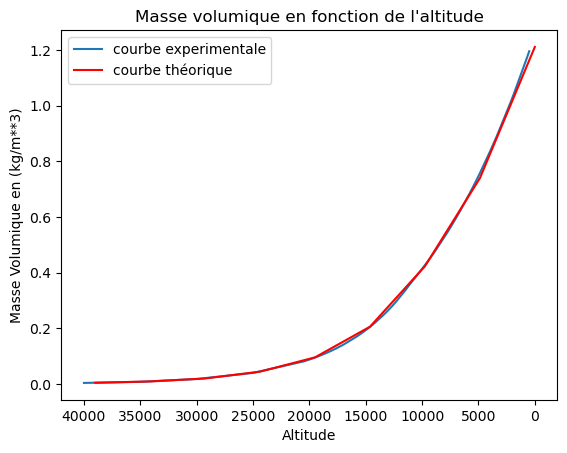

In [13]:
zq=np.loadtxt("Alt-Masse-vol.txt")[:,0]
rho=np.loadtxt("Alt-Masse-vol.txt")[:,1]

# on trace la courbe exp
plt.plot(zq, rho, label="courbe experimentale")
plt.legend()
plt.xlabel("Altitude")
plt.gca().invert_xaxis()
plt.ylabel("Masse Volumique en (kg/m**3)")
plt.title("Masse volumique en fonction de l'altitude")

#on trace la croube théorique 
liste_mv_th=[]
for i in z:
    liste_mv_th.append(MassVol_th(i))
plt.plot(z, liste_mv_th,"r",label='courbe théorique')
plt.legend()

**Question 2.i** 

Déterminer la nouvelle vitesse maximale théorique $v_\text{Bm-th-new}$ atteinte par Baumgartner. Comparer avec la valeur mesurée $v_\text{Bmax}$ et conclure.

In [14]:
m=120 #kg
S=1.1 #m^2
Cx=0.7 #constante
g=9.75 #m/s^2

VBmax_new_th=np.sqrt((2*m*g)/(S*Cx*MassVol_th(27710)))

print(f"La nouvelle vitesse maximale theorique atteinte par Baumgartner est {VBmax_new_th:1.3f} m/s")
#VBmax=376 m/s
#ici la vitesse de VBmax_new_th est inferieur a VBmax
# en effet , pour Vbmax la force de trainée n'a pas été prise en compte

La nouvelle vitesse maximale theorique atteinte par Baumgartner est 344.088 m/s


#### S'il vous reste encore du temps...

## Partie 3. Simulation de la chute libre de Felix Baumgartner 

Il s'agit ici de simuler la chute libre de Felix Baumgartner qui s'est élancé sans vitesse initiale.  
Nous allons d'abord définir la fonction qui permet de calculer l'accélération de Baumgartner.   
Puis par une méthode de discrétisation (méthode d'Euler-Cromer), nous allons simuler son accélération, sa vitesse et son altitude au cours du temps de chute.   
Nous terminerons par une analyse des résultats de simulation.

### 3.1 Accélération

Nous avons défini précédemment la fonction permettant de modéliser la dépendance de la masse volumique de l'air avec l'altitude (§ 2.2). Nous rappelons que la masse volumique intervient dans l'expression de la force de traînée (§ 1.2). Nous allons ici déterminer la fonction **"Accel(z,v)"** permettant de déterminer l'accélération de Baumgartner au cours de sa chute libre.

**Question n°3.a**

À partir de la relation fondamentale de la dynamique, écrire la fonction **Accel(z,v)**, permettant de calculer la composante $a_z$ de l'accélération $\vec{a}$ de Baumgartner au cours de sa chute libre. On néglige la dépendance de l'accélération de la pesanteur avec l'altitude ; on fixe la norme de $\vec{\mathrm{g}}$ à g = 9,75 m/s$^2$.

In [15]:
g =9.75 #m/s^2

#relation fondamentale de la dynamique : m*a = somme des forces exterieures appliquées au systeme 

def Accel(z,v):
    a=(1/2*(MassVol_th(z)*Cx*S*(v**2))/m)-g
    return a 
print (f"L'acceleration de Baumgartner à 39000 m d'altitude (soit dans sa capsule) est de", Accel(39000,0), "m/s^2")

# le - vient du fait que le vecteur acceleration de baulgartner à 39000m est vertical vers le bas

L'acceleration de Baumgartner à 39000 m d'altitude (soit dans sa capsule) est de -9.75 m/s^2


### 3.2 Méthode d'Euler-Cromer

Il s'agit ici de simuler le mouvement de Baumgartner, c'est-à-dire déterminer son accélération, sa vitesse et sa position en fonction du temps. Accélération et vitesse changent constamment au cours du temps de chute. Mais si on les regarde sur un très petit pas de temps, on peut les considérer constantes. En appliquant ce principe, il est possible de calculer une longue série de mouvements linéaires à vitesse constante, et d'obtenir ainsi des résultats étonnamment précis. La méthode d'Euler-Cromer est une méthode numérique appliquant ce principe.

La méthode d'Euler-Cromer produit une solution discrète approximative par itérations successives :   
    $v_{i+1} = v_i + Accel(z_i, v_i) * \Delta t$  
    $z_{i+1} = z_i + v_{i+1} * \Delta t$  
où Δt est le pas de temps. 

Pour mettre en oeuvre cette méthode, il faut commencer par définir le nombre d'itérations ($i$ varie de 0 à $n$) ainsi que le pas de temps (Δ$t$) : il est conseillé de prendre $n =$ 5000 et Δ$t$ = 52 ms. Les valeurs d'accélération, vitesse et altitude de Baumgartner en fonction du temps seront stockées dans des tableaux qu'il faudra donc créer au préalable. Il faudra également définir l'altitude de départ.

**Question n°3.b**

Mettre en oeuvre la méthode d'Euler-Cromer pour déterminer les composantes $a_z$ de l'accélération et $v_z$ de la vitesse ainsi que l'altitude $z$ de Baumgartner en fonction du temps $t$ de chute libre. 

In [26]:
Zi=39000
Vi=0
n=5000
dt=52*10**(-3)
liste_alt=[Zi]
liste_vit=[Vi]
liste_acc=[Accel(Zi,Vi)]

for i in range(n+1):
    Vi1=Vi+Accel(Zi,Vi)*dt
    Zi1=Zi+Vi1*dt
    liste_alt.append(Zi1)
    liste_vit.append(Vi1)
    Zi=Zi1
    Vi=Vi1
    liste_acc.append(Accel(Zi,Vi))
    
print('altitude=', liste_alt)
print('vitesse=',liste_alt)
print('acceleration', liste_acc)

altitude= [39000, 38999.973636, 38999.920908010135, 38999.84181606079, 38999.73636020264, 38999.604540506596, 38999.44635706386, 38999.26180998589, 38999.050899404414, 38998.81362547145, 38998.54998835927, 38998.25998826045, 38997.94362538783, 38997.60089997456, 38997.23181227406, 38996.83636256007, 38996.41455112662, 38995.966378288045, 38995.49184437902, 38994.99094975453, 38994.463694789876, 38993.91007988072, 38993.330105443056, 38992.72377191324, 38992.091079747974, 38991.43202942435, 38990.74662143984, 38990.03485631229, 38989.29673457996, 38988.53225680153, 38987.74142355609, 38986.924235443155, 38986.08069308271, 38985.21079711518, 38984.314548201466, 38983.39194702297, 38982.442994281555, 38981.46769069963, 38980.46603702012, 38979.43803400649, 38978.38368244274, 38977.30298313348, 38976.195936903874, 38975.0625445997, 38973.90280708736, 38972.7167252539, 38971.504300007, 38970.26553227503, 38969.00042300704, 38967.7089731728, 38966.39118376279, 38965.04705578826, 38963.676590

**Question n°3.c**

Tracer sur trois graphes placés côte-à-côte les courbes de simulation donnant $z=f(t), v_z=f(t)$ et $a_z = f(t)$. 

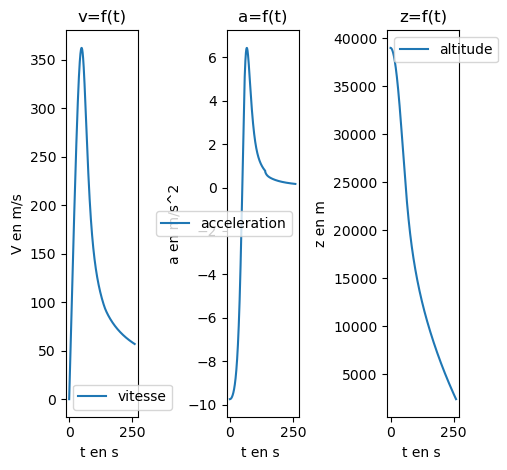

In [27]:
liste_temps=[0]
dt=52*10**(-3)
n=5000
T=0
for i in range(n+1):
    T=T +dt
    liste_temps.append(T)
    
plt.subplot(1,4,1)
plt.plot(liste_temps,np.abs(liste_vit),label='vitesse')
plt.legend()
plt.xlabel("t en s ")
plt.ylabel("V en m/s")
plt.title("v=f(t)")


plt.subplot(1,4,2)
plt.plot(liste_temps,liste_acc,label='acceleration')
plt.legend()
plt.xlabel("t en s ")
plt.ylabel("a en m/s^2")
plt.title("a=f(t)")


plt.subplot(1,4,3)
plt.plot(liste_temps ,liste_alt,label='altitude')
plt.legend()
plt.xlabel("t en s ")
plt.ylabel("z en m")
plt.title("z=f(t)")


plt.tight_layout()
figsize=(10,4)

### 3.3 Analyse des résultats de simulation

**Question n°3.d**

Quelle est l'altitude atteinte par Baumgartner au moment de l'ouverture de son parachute ? Comparer avec la valeur mesurée.

In [22]:
# de la reel valeur sui est de 2500m , cela peut sexplique par le fait que la methode d 'Eler_Cromer'
#est une methode d'approximatioon

L'altitude au moment de l'ouverture du parachute est : 43909.90 m


**Question n°3.e**

Tracer sur un même graphe les courbes de vitesse expérimentale (fichier "Temps-Vit-Baumgartner.txt" ; 1ère colonne : temps en s ; 2ème colonne : vitesse en m/s) et vitesse simulée en fonction du temps de chute libre. Quelle est la vitesse maximale obtenue par simulation ? Comparer avec la valeur mesurée.

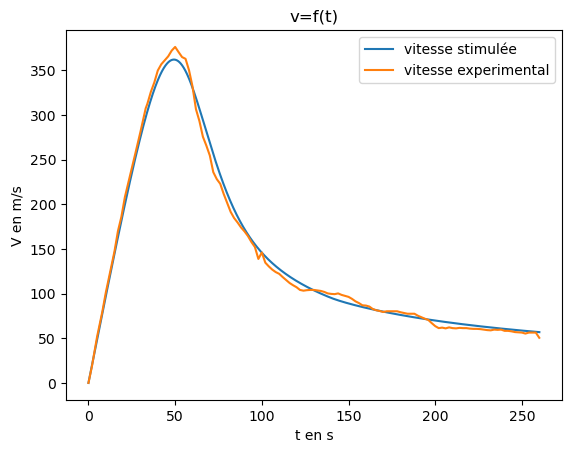

In [29]:
# graphe de la vitesse simulee 
plt.plot(liste_temps, np.abs(liste_vit),label='vitesse')
plt.xlabel("t en s")
plt.ylabel("V en m/s")
plt.title("v=f(t)")


#graphe de la vitesse experimental 
Tmp_vit_Baumgartner=np.loadtxt("Temps-Vit-Baumgartner.txt")
Tmp=Tmp_vit_Baumgartner[0:130,0]
Vit=Tmp_vit_Baumgartner[0:130,1]
plt.plot(Tmp,Vit/3.6)
plt.legend(["vitesse stimulée","vitesse experimental"])
plt.show()

**Question n°3.f**

Tracer l'histogramme des erreurs relatives entre courbes de vitesse expérimentale et vitesse simulée. 

**Question n°3.g**

Commenter les points suivants de la courbe de l'accélération : valeur initiale, valeur nulle et valeur finale.

In [ ]:
# la valeur initilae de l'acceleration est egale au poids de baumgartner cest a dire 9.75 m/s^2 puisque 
#puisque son mouvement n'a pas encore demaré Baumgartneer n'est soumis qu'a son poids 
#la valeur nulle de l'acceleration correspond au moment ou baumgartner atteint sa vitesse maximal
#cest a dire a 50secondes 
# la valeur final de l'acceleration est presque nulle non pas parceque  baumgartner a atteint a nouveau un
# maximum de vitesse mais plutot parceque sa vitesse devient de plus en plus constante